In [1]:
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Dropout, AveragePooling2D
import keras
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
import matplotlib.pyplot as plt

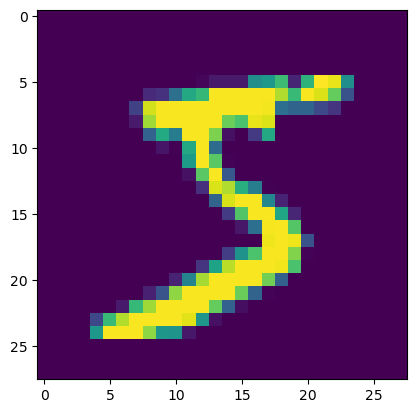

In [5]:
plt.imshow(x_train[0])

In [6]:
from keras.preprocessing import image

In [7]:
def process(image):
    image = tf.cast(image/255., tf.float32)
    return image

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
model = Sequential()

2023-12-11 01:08:29.310913: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-12-11 01:08:29.310933: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-11 01:08:29.310938: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-11 01:08:29.310969: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-11 01:08:29.310983: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
# create CNN model

model.add(Conv2D(16,kernel_size=(3,3),padding='same',activation='tanh',input_shape=(28,28,1)))
model.add(Conv2D(8,kernel_size=(3,3),padding='same',activation='tanh',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='tanh'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(33,kernel_size=(3,3),padding='same',activation='tanh',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2), strides=1, padding='same'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
his = model.fit(x_train, y_train, epochs=5, validation_data=[x_test,y_test])

Epoch 1/5


2023-12-11 01:08:30.050137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 32s 16ms/step - loss: 0.1622 - accuracy: 0.9527 - val_loss: 0.1285 - val_accuracy: 0.9571
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0730 - accuracy: 0.9773 - val_loss: 0.0837 - val_accuracy: 0.9728
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0590 - accuracy: 0.9819 - val_loss: 0.0372 - val_accuracy: 0.9881
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0520 - accuracy: 0.9840 - val_loss: 0.1798 - val_accuracy: 0.9408
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0486 - accuracy: 0.9850 - val_loss: 0.0539 - val_accuracy: 0.9828


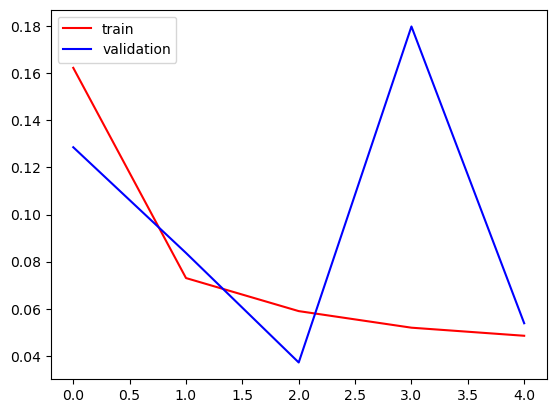

In [13]:
plt.plot(his.history['loss'],color='red',label='train')
plt.plot(his.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

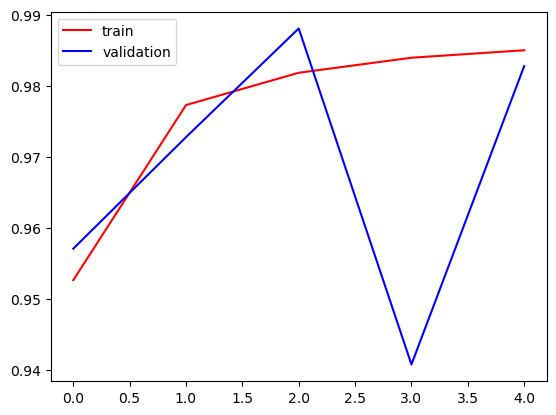

In [14]:
plt.plot(his.history['accuracy'],color='red',label='train')
plt.plot(his.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

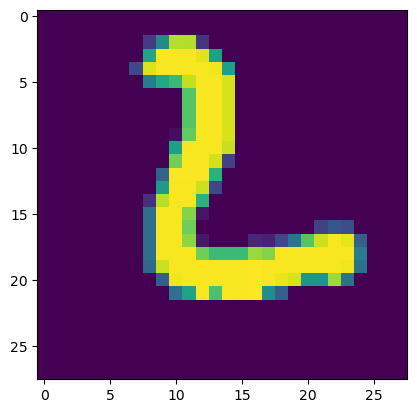

In [116]:
num = 1337

plt.imshow(x_test[num])

In [114]:
y_test[num]

2

In [117]:
model.predict(x_test[num].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 22ms/step


array([2])